In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
# train 데이터 불러오기
train = pd.read_csv('data/train.csv')

# test 데이터 불러오기
test = pd.read_csv('data/test.csv')

# sample_submission 불러오기
sample_submission = pd.read_csv('data/sample_submission.csv')

In [55]:
train

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,1954,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0


In [56]:
train.isnull().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

In [57]:
train.describe()

,id,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,ProdTaken
count,1955.000000,1861.000000,1955.000000,1853.000000,1955.000000,1942.000000,1945.000000,1898.000000,1955.000000,1955.000000,1955.000000,1928.000000,1855.000000,1955.000000
mean,978.000000,37.462117,1.641432,15.524015,2.922762,3.718332,3.568638,3.255532,0.291049,3.067519,0.619437,1.213174,23624.108895,0.195908
std,564.504207,9.189948,0.908744,8.150057,0.712276,1.004095,0.793196,1.814698,0.454362,1.372915,0.485649,0.859450,5640.482258,0.397000
min,1.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000,0.000000
25%,489.500000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20390.000000,0.000000
50%,978.000000,36.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22295.000000,0.000000
75%,1466.500000,43.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25558.000000,0.000000
max,1955.000000,61.000000,3.000000,36.000000,5.000000,6.000000,5.000000,19.000000,1.000000,5.000000,1.000000,3.000000,98678.000000,1.000000


In [91]:
sample_submission

,id,ProdTaken
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
2928,2929,0
2929,2930,0
2930,2931,0
2931,2932,0


In [58]:
train['ProdTaken'].value_counts()

0    1572
1     383
Name: ProdTaken, dtype: int64

In [99]:
train['ProdTaken'].value_counts(normalize=True)

0    0.804092
1    0.195908
Name: ProdTaken, dtype: float64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [60]:
train.loc[train['TypeofContact'].isna()]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
50,51,27.0,NaN,3,NaN,Small Business,Male,2,3.0,Deluxe,3.0,Married,1.0,0,3,1,1.0,Manager,NaN,0
83,84,28.0,NaN,1,NaN,Small Business,Male,2,3.0,Basic,3.0,Single,7.0,0,3,1,1.0,Executive,NaN,1
362,363,26.0,NaN,1,NaN,Salaried,Female,3,5.0,Basic,3.0,Married,4.0,0,4,1,2.0,Executive,NaN,0
477,478,34.0,NaN,1,NaN,Small Business,Female,2,4.0,Basic,5.0,Single,2.0,0,2,1,1.0,Executive,NaN,0
618,619,36.0,NaN,1,NaN,Small Business,Female,2,4.0,Deluxe,3.0,Married,1.0,0,5,1,1.0,Manager,NaN,0
1215,1216,31.0,NaN,1,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Divorced,1.0,0,3,1,0.0,Manager,NaN,0
1473,1474,24.0,NaN,1,NaN,Small Business,Male,3,1.0,Basic,3.0,Married,2.0,0,1,0,0.0,Executive,NaN,0
1748,1749,34.0,NaN,1,NaN,Small Business,Female,2,4.0,Basic,5.0,Single,2.0,0,1,1,0.0,Executive,NaN,0
1897,1898,25.0,NaN,3,NaN,Salaried,Male,3,4.0,Basic,5.0,Divorced,4.0,0,1,1,0.0,Executive,NaN,1
1911,1912,26.0,NaN,1,NaN,Salaried,Female,3,5.0,Basic,3.0,Married,4.0,0,4,1,0.0,Executive,NaN,0


In [61]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

objcolumns = train.columns[train.dtypes == 'object']
train[objcolumns]

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Company Invited,Small Business,Male,Basic,Married,Executive
1,Self Enquiry,Small Business,Female,Deluxe,Single,Manager
2,Company Invited,Salaried,Male,Deluxe,Married,Manager
3,Company Invited,Small Business,Male,Basic,Married,Executive
4,Self Enquiry,Salaried,Male,Deluxe,Divorced,Manager
...,...,...,...,...,...,...
1950,Self Enquiry,Small Business,Male,Basic,Single,Executive
1951,Self Enquiry,Salaried,Female,Super Deluxe,Divorced,AVP
1952,Company Invited,Small Business,Female,Basic,Divorced,Executive
1953,Self Enquiry,Small Business,Female,Deluxe,Married,Manager


In [62]:
for col in objcolumns:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

In [65]:
train

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,0,1,10.0,3,2,3,4.0,0,3.0,1,3.0,0,1,0,1.0,1,20384.0,0
1,2,34.0,1,3,NaN,3,1,2,4.0,1,4.0,2,1.0,1,5,1,0.0,2,19599.0,1
2,3,45.0,0,1,NaN,2,2,2,3.0,1,4.0,1,2.0,0,4,1,0.0,2,NaN,0
3,4,29.0,0,1,7.0,3,2,3,5.0,0,4.0,1,3.0,0,4,0,1.0,1,21274.0,1
4,5,42.0,1,3,6.0,2,2,2,3.0,1,3.0,0,2.0,0,3,1,0.0,2,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,1,1,10.0,3,2,3,5.0,0,3.0,2,2.0,0,1,1,2.0,1,20723.0,0
1951,1952,41.0,1,3,8.0,2,1,3,3.0,4,5.0,0,1.0,0,5,1,1.0,0,31595.0,0
1952,1953,38.0,0,3,28.0,3,1,3,4.0,0,3.0,0,7.0,0,2,1,2.0,1,21651.0,0
1953,1954,28.0,1,3,30.0,3,1,3,5.0,1,3.0,1,3.0,0,1,1,2.0,2,22218.0,0


In [66]:
test

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,32.0,0,3,NaN,3,2,2,5.0,1,3.0,1,1.0,0,2,0,1.0,2,19668.0
1,2,46.0,1,2,11.0,3,2,3,NaN,1,4.0,1,1.0,1,5,0,1.0,2,20021.0
2,3,37.0,1,3,22.0,3,2,3,4.0,1,3.0,1,5.0,0,5,1,0.0,2,21334.0
3,4,43.0,1,1,36.0,3,2,3,6.0,1,3.0,3,6.0,0,3,1,2.0,2,22950.0
4,5,25.0,1,3,7.0,1,1,4,4.0,0,4.0,3,3.0,1,4,1,3.0,1,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2929,54.0,1,1,6.0,3,1,2,3.0,4,3.0,2,7.0,0,4,1,1.0,0,32328.0
2929,2930,33.0,1,1,9.0,3,0,4,2.0,1,3.0,3,2.0,0,3,0,1.0,2,23733.0
2930,2931,33.0,0,1,31.0,2,2,4,4.0,1,3.0,0,3.0,0,4,1,1.0,2,23987.0
2931,2932,26.0,1,1,9.0,3,2,4,2.0,0,5.0,3,2.0,0,2,1,3.0,1,22102.0


#### 레이블 인코딩 완!

# 피처 엔지니어링 - 결측치 제거 및 대체

나이, 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색), 영업 사원이 고객에게 제공하는 프레젠테이션 기간, 
영업 사원의 프레젠테이션 후 이루어진 후속 조치 수, 선호 호텔 숙박업소 등급, 평균 연간 여행 횟수, 
함께 여행을 계획 중인 5세 미만의 어린이 수, 월 급여에서 결측치 발견  
  
  
  TypeofContact변수는 unknown인 새로운 변수로 대체 (라벨인코더에서 자동으로 해줌)  
  
  
DurationOfPitch, NumberOfFollowups, NumberOfTrips, MonthlyIncome은 describe에서 0값이 없으므로 na값이 0일 가능성이 높다.  
따라서 결측치를 0으로 채움  
  
Age(나이) 변수는 knn방법으로 보강  
  
PreferredPropertyStar는 최빈값으로 보강 (변수 중요도 낮아보임)   
또는 knn?  
  
NumberOfChildrenVisiting은 0부터 3까지의 값밖에 없으므로 더 많은 아이를 데리고 왔을 수 있으므로  
1. 5로 대체
2. 0으로 대체  
  

In [67]:
train.isnull().sum()

id                            0
Age                          94
TypeofContact                 0
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

In [69]:
# 선호 호텔 숙박업소 등급은 최빈값으로 대체, 함께 여행을 계획 중인 5세 미만의 어린이 수는 5로 대체
train.fillna({'PreferredPropertyStar':train['PreferredPropertyStar'].mode()[0],
              'NumberOfChildrenVisiting':5 },inplace=True)

In [71]:
train[['DurationOfPitch','NumberOfFollowups', 'NumberOfTrips', 'MonthlyIncome']] = train[['DurationOfPitch','NumberOfFollowups', 'NumberOfTrips', 'MonthlyIncome']].fillna(0)

In [72]:
train.isnull().sum()

id                           0
Age                         94
TypeofContact                0
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome                0
ProdTaken                    0
dtype: int64

In [73]:
# Age변수에 대한 결측치 처리. knn방법 사용. input변수에 결측값이 있으면 불가능함.
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

knn.fit(train[train['Age'].isnull()==False][train.columns.drop('Age')], train[train['Age'].isnull()==False]['Age'])

KNeighborsRegressor()

In [74]:
# 나이가 결측인 데이터를 예측
guesses = knn.predict(train[train['Age'].isnull()==True][train.columns.drop('Age')])
guesses

array([31.4, 37.4, 31.4, 37.4, 28. , 28. , 28. , 28. , 37.4, 28.8, 28.8,
       37.4, 36.6, 36.6, 36.6, 29.2, 36.6, 30. , 36.6, 30. , 30. , 32.6,
       32.6, 32.6, 34.2, 32.6, 35. , 37.2, 37.2, 37.2, 36.8, 35.4, 35. ,
       35.4, 36.8, 36.6, 36.8, 38.2, 38.2, 39.8, 38.8, 40.6, 40.6, 40.6,
       40.6, 44.4, 39.8, 36.8, 39.6, 39.6, 39.6, 39.6, 39.8, 44. , 37. ,
       39.4, 39.4, 37.8, 37.2, 37.2, 37.2, 35.6, 35.6, 35.6, 35.8, 34.2,
       34.6, 34.6, 35.4, 35.4, 34. , 36.6, 33.6, 33. , 37.6, 30.2, 35.4,
       35.4, 35.2, 39. , 36. , 36. , 36. , 34.2, 36. , 31.4, 31.4, 34.2,
       36. , 31. , 31. , 31. , 36. , 31. ])

In [75]:
train.loc[train['Age'].isnull()==True,'Age'] = guesses

In [76]:
train.isnull().sum()

id                          0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
ProdTaken                   0
dtype: int64

In [101]:
# train 결측치 채우기 완

In [77]:
test

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,32.0,0,3,NaN,3,2,2,5.0,1,3.0,1,1.0,0,2,0,1.0,2,19668.0
1,2,46.0,1,2,11.0,3,2,3,NaN,1,4.0,1,1.0,1,5,0,1.0,2,20021.0
2,3,37.0,1,3,22.0,3,2,3,4.0,1,3.0,1,5.0,0,5,1,0.0,2,21334.0
3,4,43.0,1,1,36.0,3,2,3,6.0,1,3.0,3,6.0,0,3,1,2.0,2,22950.0
4,5,25.0,1,3,7.0,1,1,4,4.0,0,4.0,3,3.0,1,4,1,3.0,1,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2929,54.0,1,1,6.0,3,1,2,3.0,4,3.0,2,7.0,0,4,1,1.0,0,32328.0
2929,2930,33.0,1,1,9.0,3,0,4,2.0,1,3.0,3,2.0,0,3,0,1.0,2,23733.0
2930,2931,33.0,0,1,31.0,2,2,4,4.0,1,3.0,0,3.0,0,4,1,1.0,2,23987.0
2931,2932,26.0,1,1,9.0,3,2,4,2.0,0,5.0,3,2.0,0,2,1,3.0,1,22102.0


In [78]:
test.isnull().sum()

id                            0
Age                         132
TypeofContact                 0
CityTier                      0
DurationOfPitch             149
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            32
ProductPitched                0
PreferredPropertyStar        16
MaritalStatus                 0
NumberOfTrips                83
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     39
Designation                   0
MonthlyIncome               133
dtype: int64

In [80]:
#test 결측치 채우기 시작

# 선호 호텔 숙박업소 등급은 최빈값으로 대체, 함께 여행을 계획 중인 5세 미만의 어린이 수는 5로 대체
test.fillna({'PreferredPropertyStar':test['PreferredPropertyStar'].mode()[0],
              'NumberOfChildrenVisiting':5 },inplace=True)

test[['DurationOfPitch','NumberOfFollowups', 'NumberOfTrips', 'MonthlyIncome']] = test[['DurationOfPitch','NumberOfFollowups', 'NumberOfTrips', 'MonthlyIncome']].fillna(0)

    
knn = KNeighborsRegressor()

knn.fit(test[test['Age'].isnull()==False][test.columns.drop('Age')], test[test['Age'].isnull()==False]['Age'])
predAge = knn.predict(test[test['Age'].isnull()==True][test.columns.drop('Age')])
test.loc[test['Age'].isnull()==True,'Age'] = predAge

In [81]:
test.isnull().sum()

id                          0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### 결측치 채우기 완~!

{'whiskers': [<matplotlib.lines.Line2D at 0x1e18a8feee0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e18a90d5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e18a8feb80>],
 'medians': [<matplotlib.lines.Line2D at 0x1e18a90dca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e18a918040>],
 'means': []}

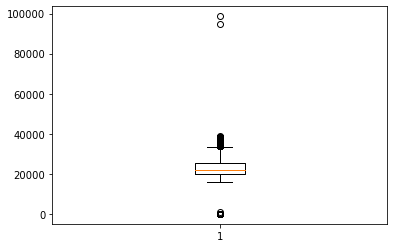

In [84]:
import matplotlib.pyplot as plt
plt.boxplot(train["MonthlyIncome"])
# 월수입은 이상치 존재하고 표준편차가 매우 크다는 것을 알아두기

In [85]:
# 분석할 의미가 없는 칼럼을 제거
train = train.drop(columns=['id'])
test = test.drop(columns=['id'])

In [86]:
target = train['ProdTaken']

In [87]:
# 검증데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1564, 19), (391, 19), (1564,), (391,))

In [88]:
X_train = X_train.drop(columns=['ProdTaken'])
X_val = X_val.drop(columns=['ProdTaken'])
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1564, 18), (391, 18), (1564,), (391,))

In [89]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=2022)
model.fit(X_train, y_train)
pred = model.predict_proba(X_val)

In [90]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, pred[:,1])

0.8634769348074723

In [91]:
# 의사결정나무
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=2022)
model.fit(X_train, y_train)
pred = model.predict_proba(X_val)
roc_auc_score(y_val, pred[:,1])

0.765821578345406

In [92]:
# xgboost
import xgboost as xgb
model = xgb.XGBRFClassifier(random_state=2022,eval_metric='mlogloss', use_label_encoder =False)
model.fit(X_train, y_train)
pred = model.predict_proba(X_val)
roc_auc_score(y_val, pred[:,1])

# https://webnautes.tistory.com/1672

0.8529165078154785

In [93]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
pred = model.predict_proba(X_val)
roc_auc_score(y_val, pred[:,1])
# https://nsbg.tistory.com/entry/Sklearn-ConvergenceWarning-lbfgs-failed-to-converge-status1

0.7010674799847503

In [94]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
pred = model.predict_proba(X_val)
roc_auc_score(y_val, pred[:,1])

0.6169653069004957

In [81]:
# 서포트벡터머신
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
pred = model.predict_proba(X_val)
roc_auc_score(y_val, pred[:,1])

# https://beausty23.tistory.com/146

AttributeError: predict_proba is not available when  probability=False

In [95]:
# 서포트벡터머신
from sklearn.svm import SVC
model = SVC(random_state=2022, probability=True)
model.fit(X_train, y_train)
pred = model.predict_proba(X_val)
roc_auc_score(y_val, pred[:,1])

0.5331300038124285

In [96]:
# 랜덤 포레스트로 모델 결정

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=2022)
model.fit(X_train, y_train)
prediction = model.predict(test)
sample_submission['ProdTaken'] = prediction

In [98]:
sample_submission['ProdTaken'].value_counts()

0    2793
1     140
Name: ProdTaken, dtype: int64

In [100]:
sample_submission['ProdTaken'].value_counts(normalize=True)

0    0.952267
1    0.047733
Name: ProdTaken, dtype: float64